In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('wine.data',header = None)
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y,)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Calculate scatter matrix

In [140]:
#First calculate mean vector: mean_vector_i(1*13)
mean_vectors = []
for i in np.unique(y_train):
    X_train_i = X_train_std[y_train == i,:]
    mean_vector_i = X_train_i.mean(axis = 0)
    mean_vectors.append(mean_vector_i)
mean_vectors = np.array(mean_vectors)

In [141]:
#Second calculate within-class scatter matrix: S_within
# np.set_printoptions(precision=4)
S_within = np.zeros((X.shape[1],X.shape[1]))
# S_between = sigma1 + sigma2 + sigma3
for i in np.unique(y_train):
    X_train_i = X_train_std[y_train == i,:]
    S_within += np.cov(X_train_i.T)

In [142]:
#Third calculate between-class scatter matrix: S_between
S_between = np.zeros((X.shape[1],X.shape[1]))
mean_overall_vector = X_train_std.mean(axis = 0)
for i,mean_vector in enumerate(mean_vectors):
    n_i = X_train_std[y_train == i + 1,:].shape[0]
    mean_vector = mean_vector.reshape(X.shape[1],1)
    mean_overall_vector = mean_overall_vector.reshape(X.shape[1],1)
    S_between += n_i*(mean_vector - mean_overall_vector).dot(( mean_vector - mean_overall_vector).T)

In [150]:
#Then sovle the eigenvalue 
eigen_vals ,eigen_vecs = np.linalg.eig(np.linalg.inv(S_within).dot(S_between))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True)
for i in eigen_pairs:
    print(i[0])

349.61780890599397
172.76152218979385
3.2209587419662555e-14
3.2209587419662555e-14
2.6106523402387364e-14
1.7038977764581827e-14
1.7038977764581827e-14
1.687554433463065e-14
1.687554433463065e-14
7.584950171788759e-15
2.9412105155181146e-15
2.9412105155181146e-15
0.0


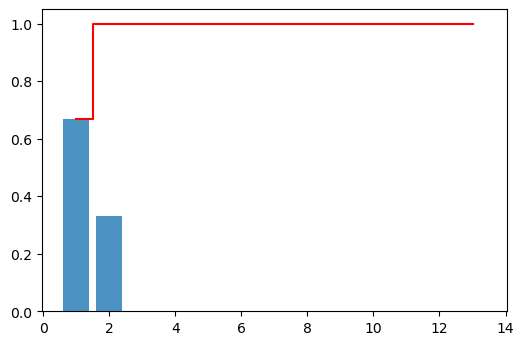

In [154]:
al = np.abs(sum(eigen_vals))
eigen_vals_percent = [np.abs(i)/al for i in sorted(eigen_vals, reverse = True)]
eigen_vals_cumsum = np.cumsum(eigen_vals_percent)
plt.figure(figsize=(6,4),dpi = 100)
plt.bar(range(1,len(eigen_vals)+1),eigen_vals_percent ,alpha = 0.8,align = 'center')
plt.step(range(1,len(eigen_vals)+1),eigen_vals_cumsum,where = 'mid',color = 'red')
plt.show()